In [24]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import datetime
import matplotlib.pyplot as plt

In [25]:
page = requests.get("https://weather.com/weather/tenday/l/San+Francisco+CA?canonicalCityId=dfdaba8cbe3a4d12a8796e1f7b1ccc7174b4b0a2d5ddb1c8566ae9f154fa638c")
#page
#page.status_code
#page.content

In [26]:
def converter(fahrenheit):
    celsius = (float(fahrenheit) - 32) * (5/9)
    return round(celsius, 1)

In [56]:
soup =BeautifulSoup(page.content, 'html.parser')
days = soup.find_all('h2', class_='DetailsSummary--daypartName--1Mebr')
days_list = []
for i in days:
    day = i.get_text().split()[0]
    days_list.append(day)
#print(days_list)


date_list = []
for i in range(10):
    date=datetime.datetime.now() + datetime.timedelta(days=i)
    date_list.append(date.strftime('%m-%d'))
#print(date_list)

condition_description = soup.find_all('span', class_='DetailsSummary--extendedData--aaFeV')
condition_list = []
for i in condition_description:
    condition = i.get_text()
    condition_list.append(condition)
#print(condition_list)

mmax_temp = soup.find_all('span', class_='DetailsSummary--highTempValue--3x6cL')
mmax_temp_list = []
for i in mmax_temp:
    mmax = i.get_text().replace('°', '')
    mmax_temp_list.append(mmax)
mmax_temp_celsius = []
for i in mmax_temp_list:
    mmax_temp_celsius.append(converter(i))
#print(mmax_temp_celsius)

mmin_temp = soup.find_all('span', class_='DetailsSummary--lowTempValue--1DlJK')
mmin_temp_list = []
for i in mmin_temp:
    mmin = i.get_text().replace('°', '')    
    converter(mmin)
    mmin_temp_list.append(mmin)
mmin_temp_celsius = []
for i in mmin_temp_list:
    mmin_temp_celsius.append(converter(i))
#print(mmin_temp_celsius)

element_targetted = ['DetailsSummary--daypartName--1Mebr', 'NaN', 'DetailsSummary--extendedData--aaFeV', 'DetailsSummary--highTempValue--3x6cL', 'DetailsSummary--lowTempValue--1DlJK' ]

In [57]:
df_weather_dict = {'day' : days_list[0:10],
            'date': date_list[0:10],
            'condition': condition_list[0:10],
            'max temp': mmax_temp_celsius[0:10],
            'min temp': mmin_temp_celsius[0:10]}
df_weather = pd.DataFrame(df_weather_dict).set_index('day')


print(df_weather)

        date      condition  max temp  min temp
day                                            
Today  12-09         Cloudy      16.7       7.2
Thu    12-10  Partly Cloudy      13.9       5.6
Fri    12-11  Partly Cloudy      12.8       7.8
Sat    12-12        Showers      13.9      10.0
Sun    12-13           Rain      13.9       8.9
Mon    12-14  Partly Cloudy      13.9       6.1
Tue    12-15  Partly Cloudy      13.9       7.2
Wed    12-16     AM Showers      14.4       7.2
Thu    12-17  Mostly Cloudy      14.4       7.2
Fri    12-18  Mostly Cloudy      13.9       7.2


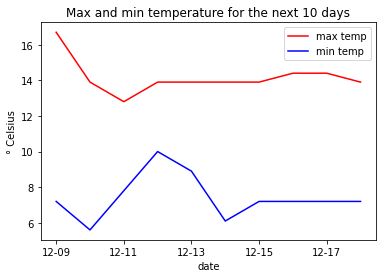

In [29]:
df_weather.plot(kind='line', x='date', y='max temp', color='red',ax=plt.gca())
df_weather.plot(kind='line', x='date', y='min temp', color='blue',ax=plt.gca())
plt.ylabel('° Celsius')
plt.title('Max and min temperature for the next 10 days')
plt.show()

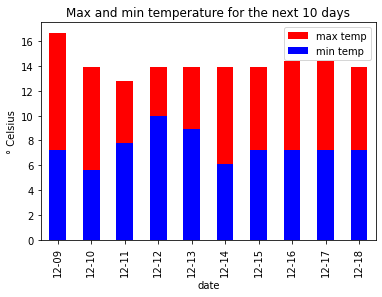

In [38]:
df_weather.plot(kind='bar', x='date', y='max temp', color='red',ax=plt.gca())
df_weather.plot(kind='bar', x='date', y='min temp', color='blue',ax=plt.gca())
plt.ylabel('° Celsius')
plt.title('Max and min temperature for the next 10 days')
plt.show()

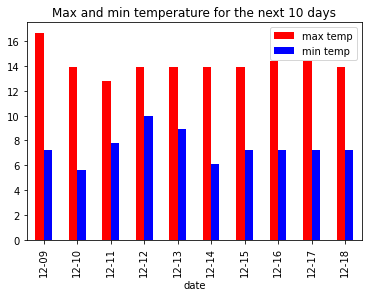

In [52]:
df_weather.plot.bar(x='date', y=['max temp', 'min temp'], title='Max and min temperature for the next 10 days', color=['red', 'blue'])
plt.show()

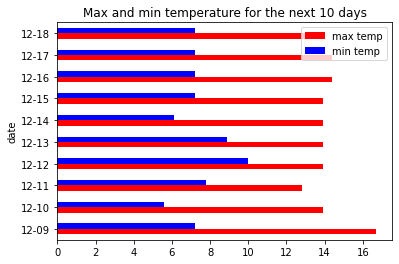

In [53]:
df_weather.plot.barh(x='date', y=['max temp', 'min temp'], title='Max and min temperature for the next 10 days', color=['red', 'blue'])
plt.show()